In [61]:
import numpy as np 

import matplotlib.pylab as plt 

import panel as pn

plt.rcParams["figure.figsize"] = (20,10)

import numpy as np
import xarray as xr
from datetime import datetime 
from datetime import timedelta

import netCDF4 as nc

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import panel.widgets as pnw
import param

import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.axes as maxes


In [2]:
# #set geographical bounds for data download
# min_lon='0';
# max_lon='5';
# min_lat='54.5';
# max_lat='57.5';

# #set geographical bounds for data download
# min_depth='0';
# max_depth='150.0001';


# #set temporal bounds for data download
# model_start_time = (datetime.now() - timedelta(days=4)) .strftime("%Y-%m-%d") 
# model_end_time = (datetime.now() + timedelta(days=6)) .strftime("%Y-%m-%d") 



# Extract variables from netcdf files

fn_temp = './AMM_7_DATA/2019-01-25_2019-02-04_FOAM_temp.nc'
ds_temp = nc.Dataset(fn_temp)
lon = ds_temp['lon'][:]
lat = ds_temp['lat'][:]
time = ds_temp['time'][:]
depth = ds_temp['depth'][:]
depth= np.array([ 0,3,10,15,20,30,50,75,100,125,150])
temp = ds_temp['votemper'][:]

fn_sal = './AMM_7_DATA/2019-01-25_2019-02-04_FOAM_sal.nc'
ds_sal = nc.Dataset(fn_sal)
sal = ds_sal['vosaline'][:]

fn_vel = './AMM_7_DATA/2019-01-25_2019-02-04_FOAM_vel.nc'
ds_vel = nc.Dataset(fn_vel)
u = ds_vel['vozocrtx'][:]
v = ds_vel['vozocrtx'][:]


da_temp = xr.DataArray(temp, dims=['time','depth','lon', 'lat'],
                           coords={'time': time,
                                   'depth': depth,
                                   'lon': lon,
                                   'lat': lat},)


ds_vel = xr.Dataset(
    {'u_vel' :(['time','depth','lon', 'lat'],u),
     'v_vel' :(['time','depth','lon', 'lat'],v),},
                           coords={'time': time,
                                   'depth': depth,
                                   'lon': lon,
                                   'lat': lat},)

Column
    [0] ParamFunction(function)
    [1] Select(name='Depth', options=[0, 3, 10, 15, ...], value=15, width=100)
    [2] Player(end=9, loop_policy='loop', name='Time', value=5)
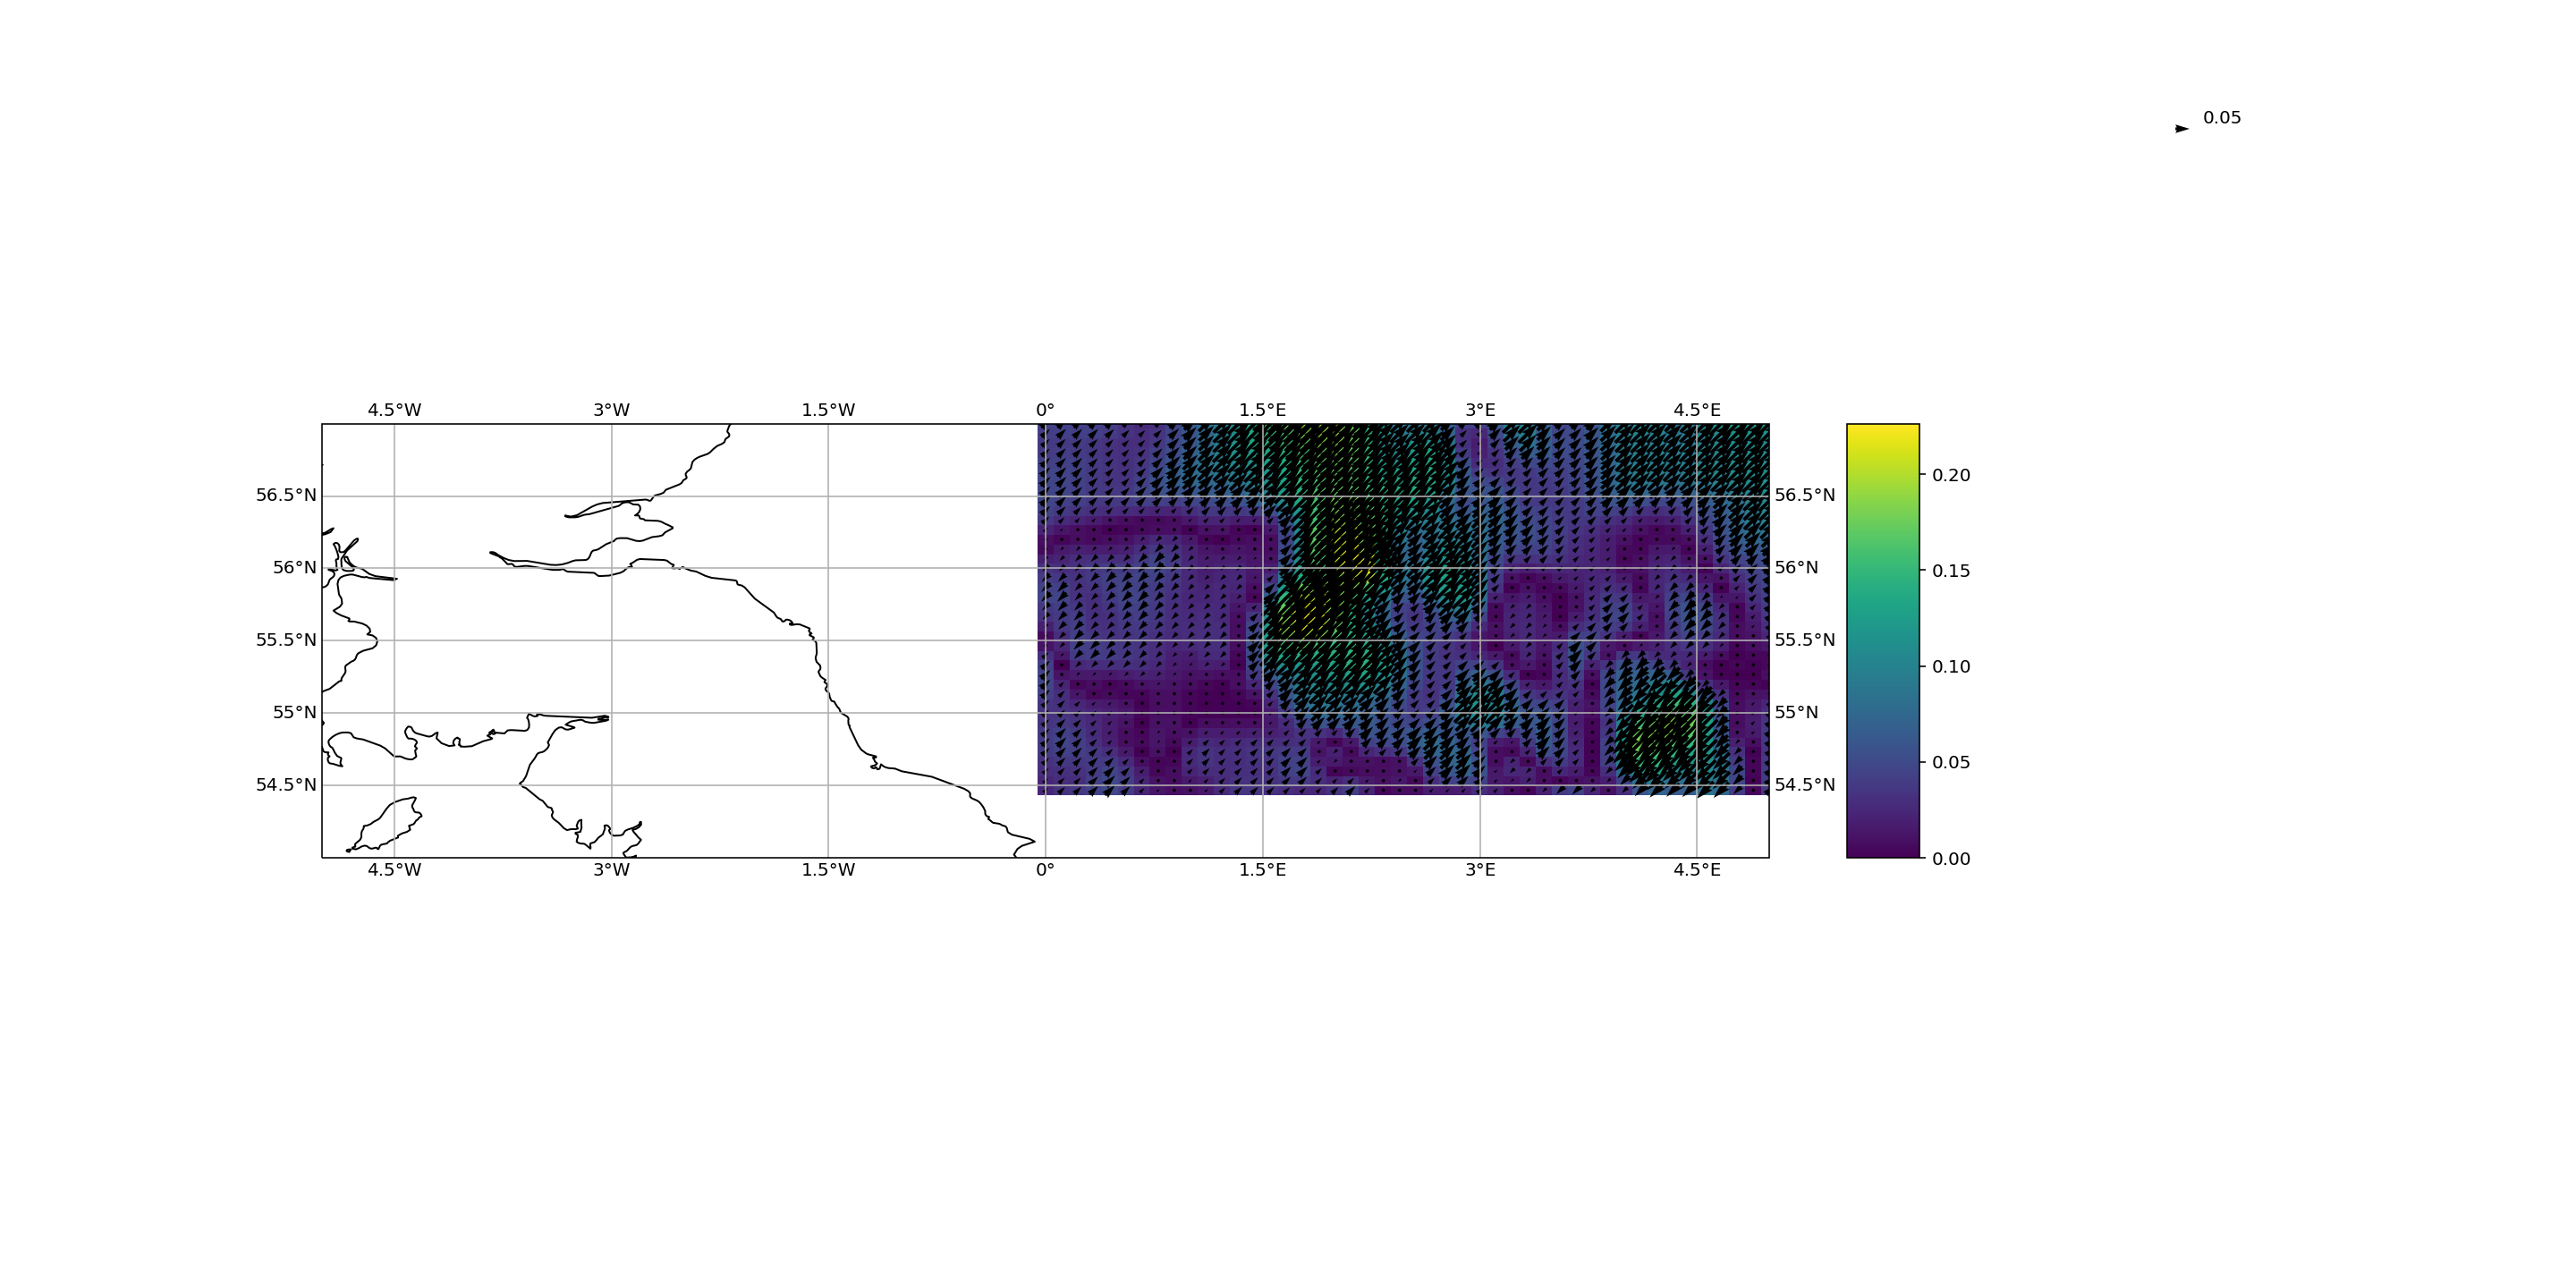

In [72]:
pn.extension()


def vel_plot(variable='ds_vel', depth_selection=1,time_selection=1):
    
  
    depth_selection = np.where(depth == depth_select.value)[0]
    depth_selection=depth_selection[0]
    time_selection = time_player.value
    
    fig = Figure()
    ax = fig.add_subplot(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_xlim([-5, 5])
    ax.set_ylim([54, 57])
    ax.gridlines(draw_labels=True)
    
    
    da_vel_mag_time_depth_select = np.sqrt(np.square(ds_vel.u_vel.isel(time=time_selection).isel(depth=depth_selection))+np.square(ds_vel.v_vel.isel(time=time_selection).isel(depth=depth_selection)))
    vel_mag_plot = da_vel_mag_time_depth_select.plot(x='lon', y='lat',ax=ax)
    cb = vel_mag_plot.colorbar
    cb.remove()
    
    vel_qiver_plot = ds_vel.isel(time=time_selection).isel(depth=depth_selection).plot.quiver(x="lon", y="lat", u="u_vel", v="v_vel",units='width',ax=ax)
    ax.set_title('')
    divider = make_axes_locatable(ax)
    cax = divider.new_horizontal(size='5%', pad=0.6, axes_class=maxes.Axes)
    fig.add_axes(cax)
    fig.colorbar(vel_mag_plot, cax=cax, orientation='vertical')
    


    return fig



depth_select = pn.widgets.Select(name='Depth', value=(depth[3]),options=list((depth)),width=100)
time_player = pn.widgets.Player(name='Time', start=0, end=9, value=5, loop_policy='loop')
reactive_vel = pn.bind(vel_plot,depth_select,time_player)

run_widgets = pn.Column(reactive_vel,depth_select,time_player)
run_widgets




### 